## Project: Model to Predict Term Deposit Subscription by Clients

#### Table of Contents
- [Introduction](#intro)
- [Data Gathering](#gather)
- [Exploratory Data Analysis](#explore)
- [Feature Engineering](#feature)
- [Modeling and Evaluation](#model)
- [Conclusion](#conclude)

<a id="intro"></a>
#### Introduction

The objective of this project is to build a predictive model to determine the likelihood of a client subscribing to a term deposit based on the features provided in the dataset.

The datasets provided are described below:
1) **bank-additional-full.csv** with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed. 
2) **bank-additional.csv** with 10% of the examples (4119), randomly selected from 1), and 20 inputs. 
3) **bank-full.csv** with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).  
4) **bank.csv** with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).  

Since **bank-additional-full.csv** is the most complete dataset and the most recent version, this project will use that dataset for the model.

The variables in the dateset are as follows.

- age: age of client

- job : type of job 

 - marital : marital status 

- education:  

 - default: has credit in default

- housing: has housing loan

- loan: has personal loan

- contact: contact communication type 

- month: last contact month of year

- day_of_week: last contact day of the week 

 - duration: last contact duration, in seconds 

- campaign: number of contacts performed during this campaign and for this client 

- pdays: number of days that passed by after the client was last contacted from a previous campaign 

- previous: number of contacts performed before this campaign and for this client 

- poutcome: outcome of the previous marketing campaign 

- emp.var.rate: employment variation rate 

- cons.price.idx: consumer price index 

 - cons.conf.idx: consumer confidence index 

 - euribor3m: euribor 3 month rate 

- nr.employed: number of employees

Predict variable (desired target):
- y: has the client subscribed a term deposit? 

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

<a id="gather"></a>
##### Data Gathering

In [3]:
# import the semi-colon separated bank-additional-full.csv file into a dataframe and specify
df = pd.read_csv("bank-additional-full.csv",sep=';')

In [4]:
# set option to display all columns
pd.set_option('display.max_columns', None)

# display first 5 rows of the dataframe
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# display a random sample of 10 rows
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24059,34,blue-collar,divorced,high.school,no,yes,no,telephone,oct,thu,160,1,999,0,nonexistent,-0.1,93.798,-40.4,4.794,5195.8,yes
830,49,entrepreneur,married,basic.9y,no,yes,no,telephone,may,wed,439,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
14459,42,self-employed,divorced,basic.6y,unknown,yes,no,cellular,jul,tue,94,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
35183,48,admin.,married,high.school,unknown,yes,no,cellular,may,fri,611,5,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,yes
19539,32,technician,married,university.degree,no,no,no,cellular,aug,thu,155,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
25887,38,technician,married,professional.course,no,no,no,cellular,nov,wed,194,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
5462,35,admin.,married,high.school,no,yes,yes,telephone,may,fri,260,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
22073,45,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,188,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
2029,55,admin.,divorced,university.degree,no,yes,no,telephone,may,mon,38,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
19759,38,technician,divorced,professional.course,no,yes,no,cellular,aug,fri,117,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


After successfully loading the data into a dataframe, the next step is to perform data assessment to identify any issues with the data that may interfere with the model.

In [6]:
# check shape of dataframe
df.shape

(41188, 21)

The dataset has 41188 rows with 21 columns.

In [7]:
# display dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The data has no nulls and the data types appear appropriate at this stage. Next step is to perform Exploratory Data Analysis on the data to identify any patterns, correlations, and outliers.

<a id="explore"></a>
#### Exploratory Data Analysis

##### Target variable analysis

In [8]:
# check value counts of y column which indicates subscription or not
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

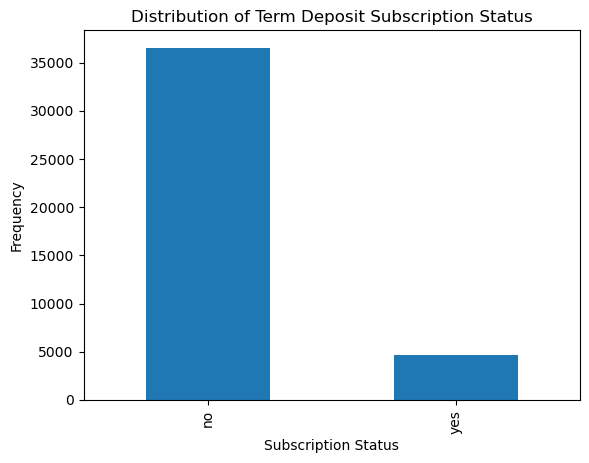

In [9]:
# visualize value counts
# save value counts to variable
response = df['y'].value_counts()
#plot bar chart from value counts
response.plot(kind='bar')
# set xlabel
plt.xlabel("Subscription Status")
# set ylabel
plt.ylabel("Frequency")
# set chart title
plt.title("Distribution of Term Deposit Subscription Status")\
# display chart
plt.show()

Majority of the clients in the survey did not subscribe to a term deposit.

In [10]:
def plot_histogram(column):
    plt.figure(figsize=(6,4))
    sns.histplot(df[column], bins =30)
    plt.title(f"Distribution of {column}")
    plt.show

In [11]:
def plot_facetgrid(column, type):
    if type == 'histogram':
        g = sns.FacetGrid(df, col='y', sharey=True)
        g.map(sns.histplot, column )
        plt.show()
    elif type == 'countplot':
        g = sns.FacetGrid(df, col='y', sharey=True)
        g.map(sns.countplot, column )
        plt.show()

In [12]:
def plot_countplot(column):
    sns.countplot(data=df, x=column)
    plt.title(f"Distribution of {column}")
    plt.xlabel(f"{column}")
    plt.ylabel("frequency")
    plt.show()

In [13]:
df['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

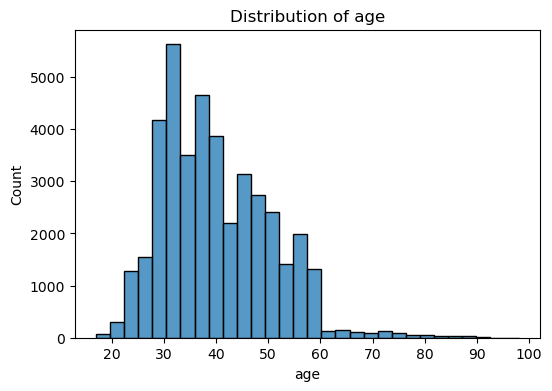

In [14]:
plot_histogram('age')

The distribution of **age** is right skewed with most clients falling between the age of 30 to 40 years old and very few clients older than 60 years. For the model, the ages will be binned.

Next step is to check the age distribution of clients who subscribed to the term deposit and those who did not.


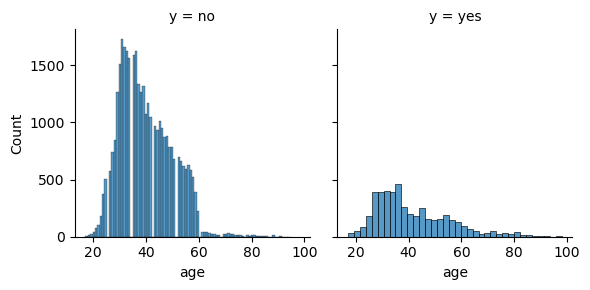

In [15]:
plot_facetgrid('age', 'histogram')

The group of clients that did not subscribe to a term deposit have a larger proportion of young individuals (20 -50 years), while the group that subscribed to the term deposit have a more diverse spread but with more people in the 30-40 range

In [16]:
df['duration'].value_counts()

90      170
85      170
136     168
73      167
124     164
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: duration, Length: 1544, dtype: int64

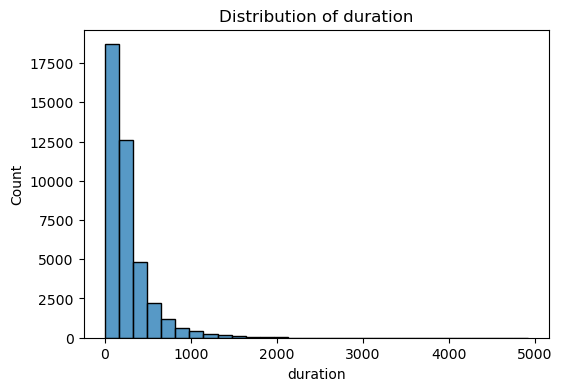

In [17]:
plot_histogram('duration')

The distribution of **duration** is right skewed. This means most calls are short (under 200 seconds) with very few long-duration calls.


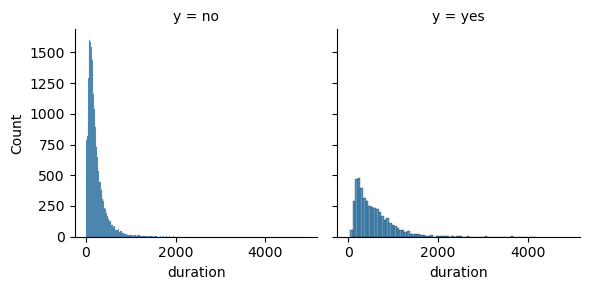

In [18]:
plot_facetgrid('duration', 'histogram')

The no subscription group seems to have a higher concentration of shorter durations, while the subscription group shows a slightly more evenly distributed range of durations.

In [19]:
df['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

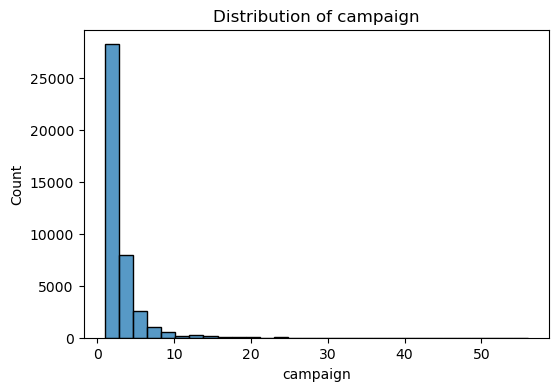

In [20]:
plot_histogram('campaign')

The distribution of **campaign** is also right skewed with most clients being contacted 1-3 times.


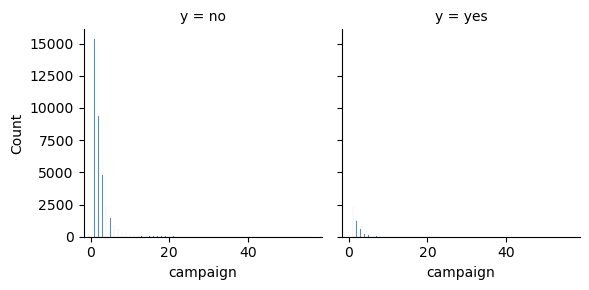

In [21]:
plot_facetgrid('campaign', 'histogram')

The distribution suggests that in both the non-subscription group (y=no) and the subscription group (y = yes), most individuals have participated in few or no campaigns. However, the subscription group has slightly more variation with a few higher values.

In [22]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

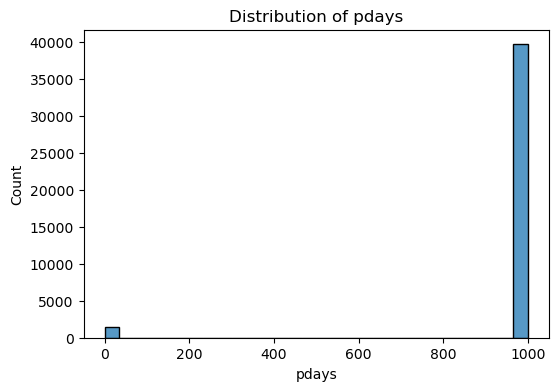

In [23]:
plot_histogram('pdays')

Majority of the client were contacted after 999 days. However, research on the data shows that 999 means the client has not been previously contacted.

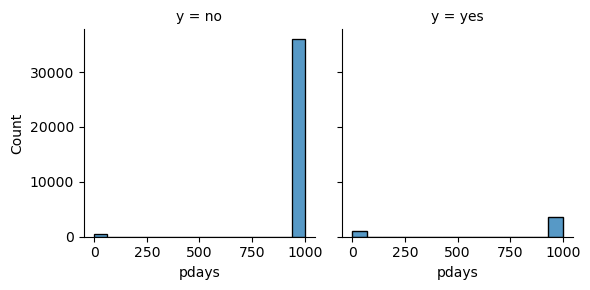

In [24]:
plot_facetgrid('pdays', 'histogram')

For the "no" group, most individuals seem to have not been contacted previously, as indicated by the overwhelming number of 1000 values.
For the "yes" group, there is some variation, with a few having recent contact (0 days), while others still have the value of 1000, indicating no prior contact.

In [25]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

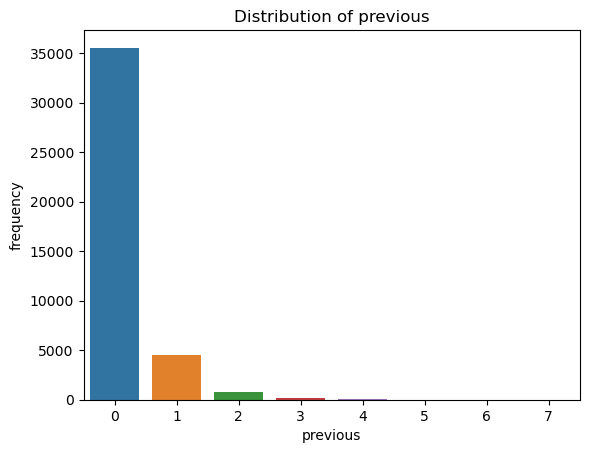

In [26]:
plot_countplot('previous')

The vast majority of observations have a "previous" value of 0, indicating that the majority of individuals have had no prior contact before the current campaign.

C:\Users\ayer\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


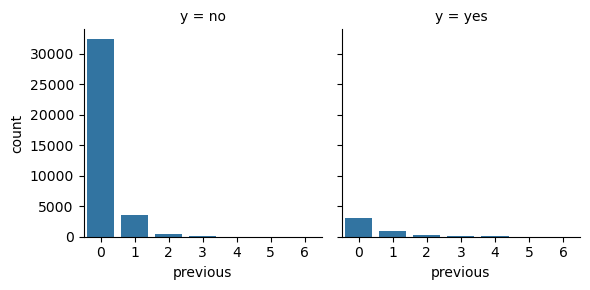

In [27]:
plot_facetgrid('previous', 'countplot')

For both groups, majority of clients have not contacted before, while a few have been contacted 1-3 times.

In [28]:
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

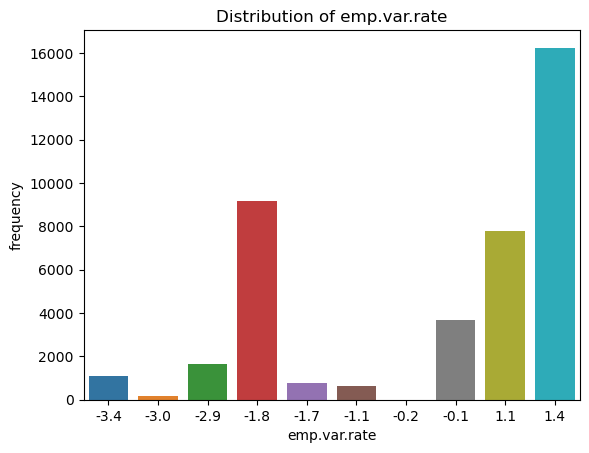

In [29]:
plot_countplot('emp.var.rate')

Most of the clients contacted have an employment variation rate value of 1.4

C:\Users\ayer\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


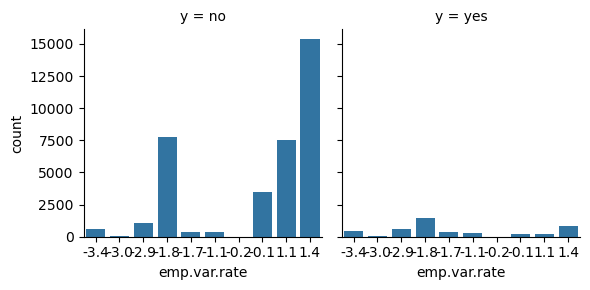

In [30]:
plot_facetgrid('emp.var.rate', 'countplot')

For the subscription group, majority of clients had a negative employment variation rate of -1.8.

In [31]:
df['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

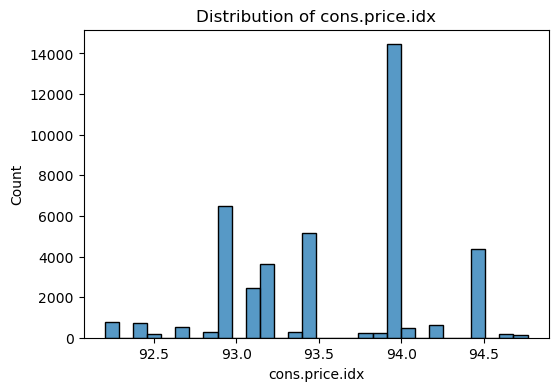

In [32]:
plot_histogram('cons.price.idx')

Majority of clients had a consumer price index of 94.

In [33]:
df['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

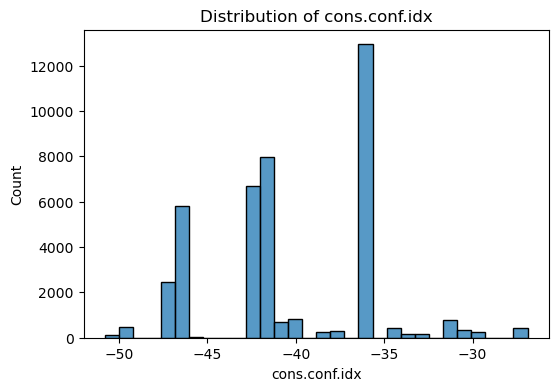

In [34]:
plot_histogram('cons.conf.idx')

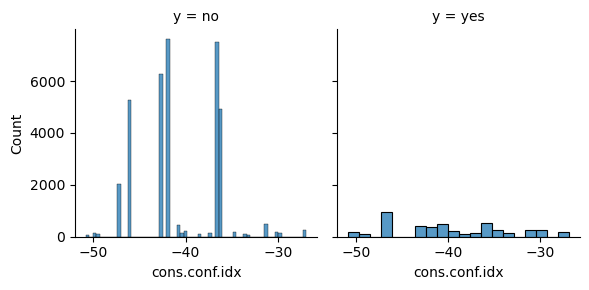

In [35]:
plot_facetgrid('cons.conf.idx', 'histogram')

In [36]:
df['euribor3m'].value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: euribor3m, Length: 316, dtype: int64

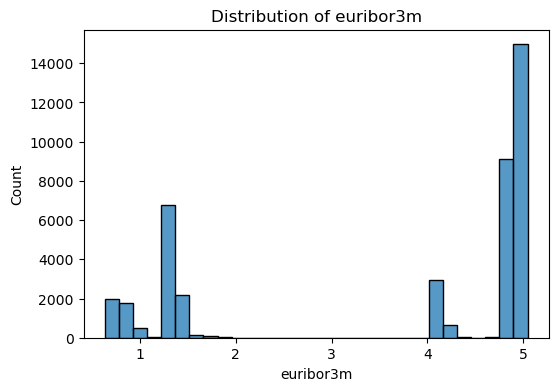

In [37]:
plot_histogram('euribor3m')

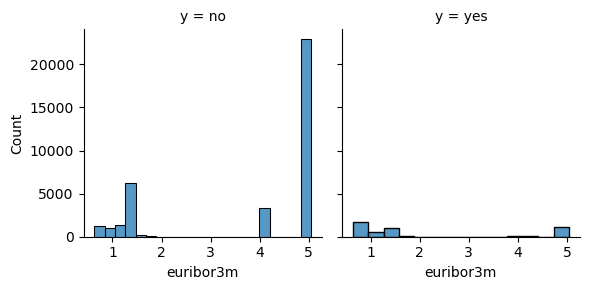

In [38]:
plot_facetgrid('euribor3m', 'histogram')

In [39]:
df['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

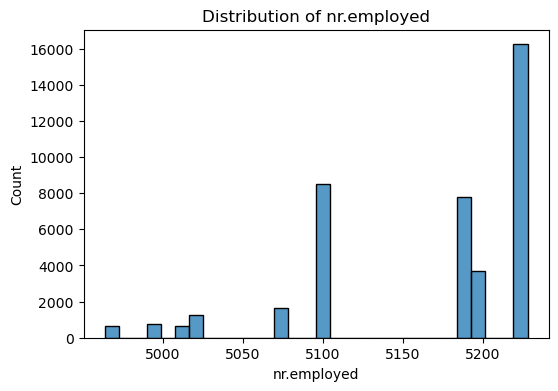

In [40]:
plot_histogram('nr.employed')

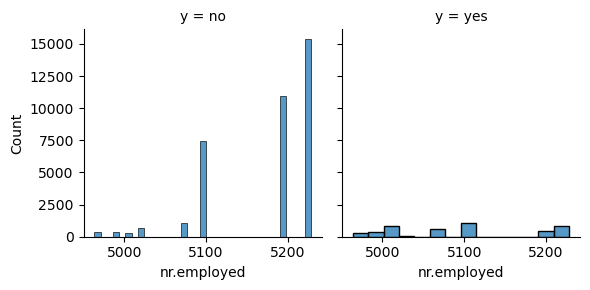

In [41]:
plot_facetgrid('nr.employed', 'histogram')

In [42]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

<Axes: >

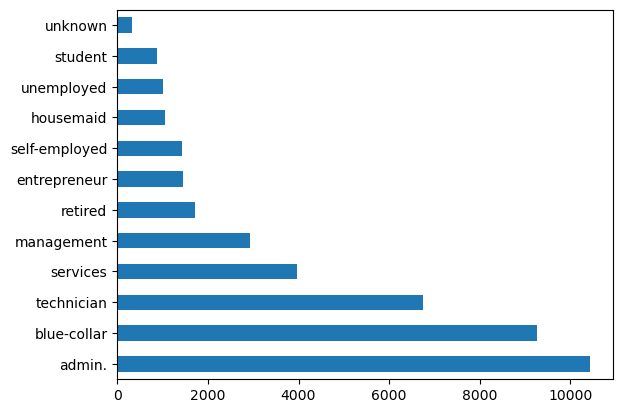

In [43]:
df['job'].value_counts().plot(kind='barh')

Majority of the clients worked as admin.

In [44]:
df_job = df.groupby(['y', 'job'], as_index=False).size()
pv_job = pd.pivot_table(df_job, values='size', columns=['y'], index='job')
pv_job

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


For both groups, majority of clients worked as admins.

In [45]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


EDA for job and target variable
y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37


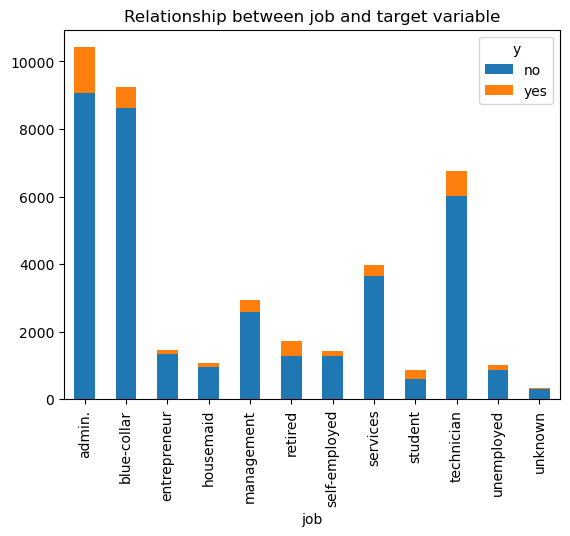


EDA for marital and target variable
y            no   yes
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12


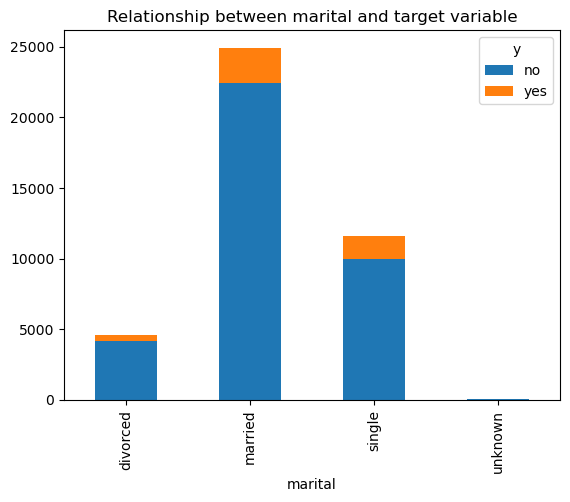


EDA for education and target variable
y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251


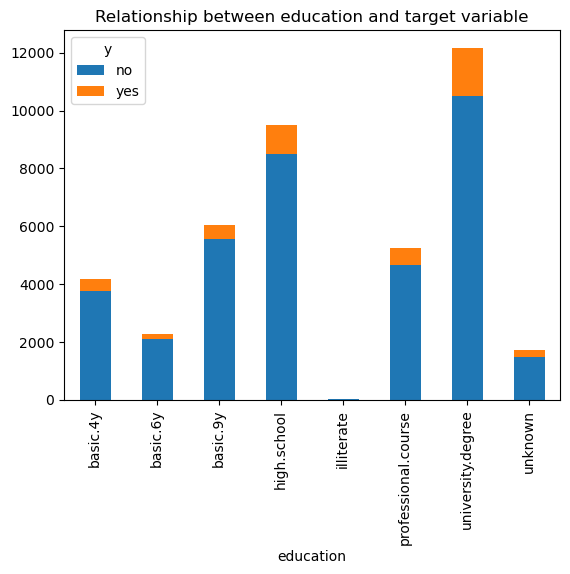


EDA for default and target variable
y           no   yes
default             
no       28391  4197
unknown   8154   443
yes          3     0


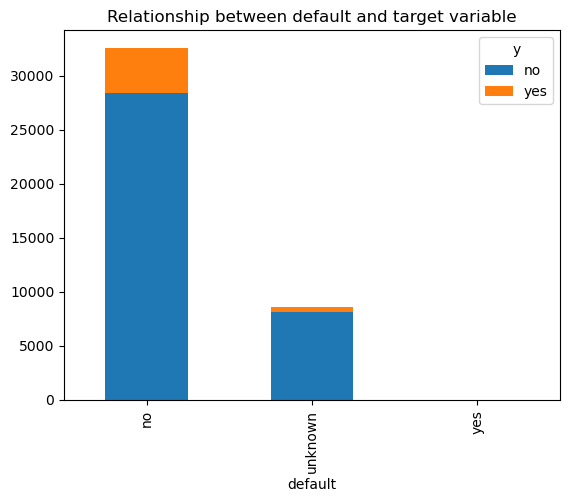


EDA for housing and target variable
y           no   yes
housing             
no       16596  2026
unknown    883   107
yes      19069  2507


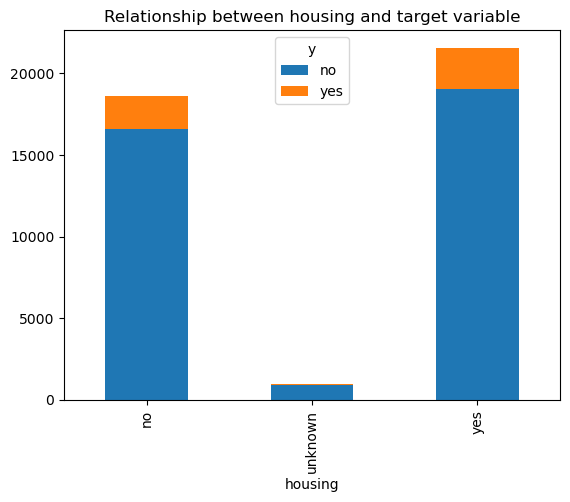


EDA for loan and target variable
y           no   yes
loan                
no       30100  3850
unknown    883   107
yes       5565   683


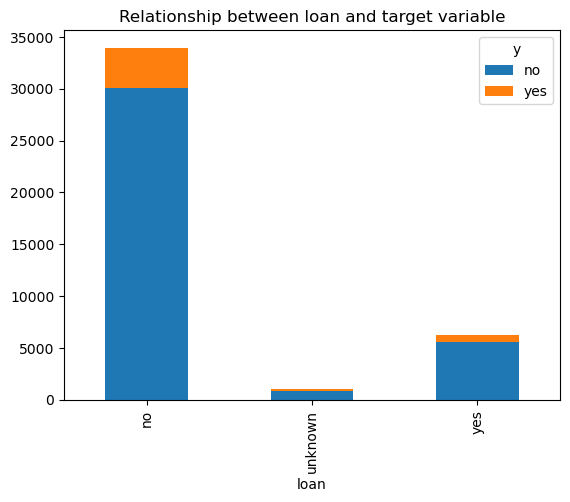


EDA for contact and target variable
y             no   yes
contact               
cellular   22291  3853
telephone  14257   787


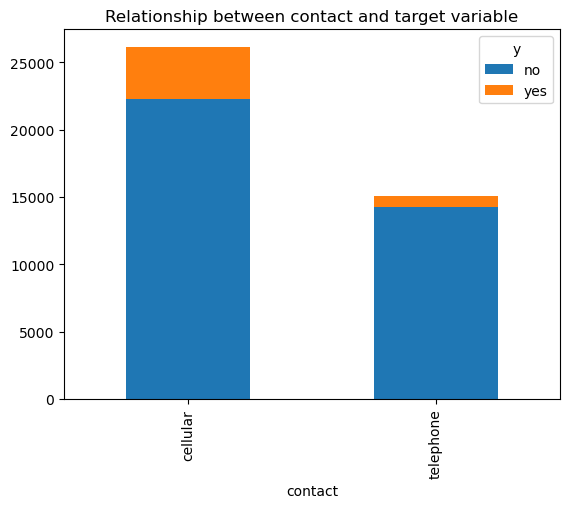


EDA for month and target variable
y         no  yes
month            
apr     2093  539
aug     5523  655
dec       93   89
jul     6525  649
jun     4759  559
mar      270  276
may    12883  886
nov     3685  416
oct      403  315
sep      314  256


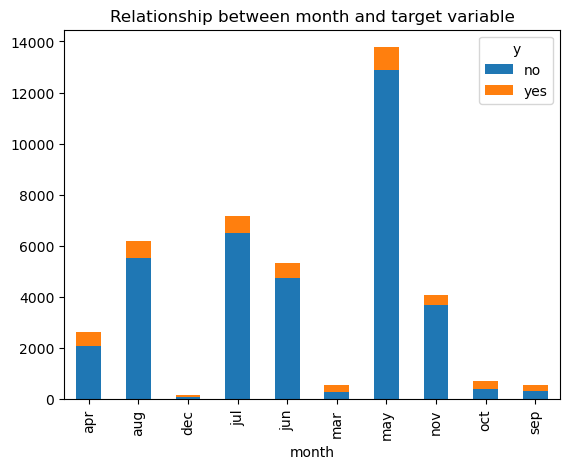


EDA for day_of_week and target variable
y              no   yes
day_of_week            
fri          6981   846
mon          7667   847
thu          7578  1045
tue          7137   953
wed          7185   949


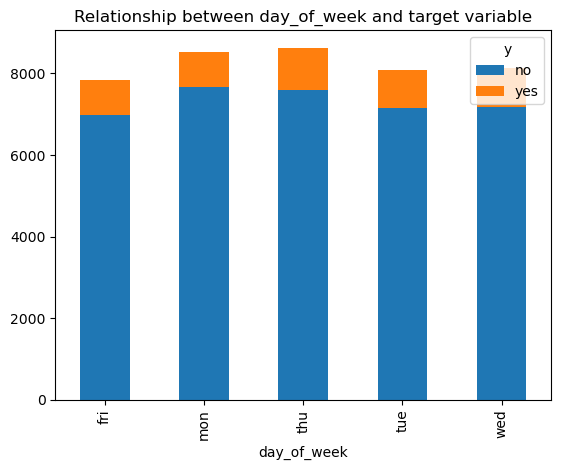


EDA for poutcome and target variable
y               no   yes
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894


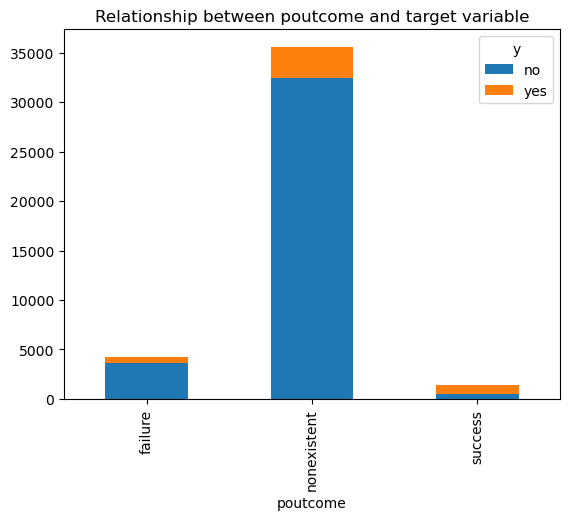

In [46]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    if col != 'y':
        print(f"\nEDA for {col} and target variable")
        print(pd.crosstab(df[col], df['y']))
        pd.crosstab(df[col], df['y']).plot(kind='bar', stacked=True)
        plt.title(f'Relationship between {col} and target variable')
        plt.show()


<a id="feature"><a/>
#### Feature Engineering


One hot encoding will be used to convert categorical values into a binary format so that it can be effectively used in the model. After encoding, Recursive Feature Limitation (RFE) will be used to determine the best predictors for the model.

In [47]:
encoder = OneHotEncoder(drop='first', sparse=False)

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [48]:
regression = LogisticRegression()
y = 'y'
new_cols = df_encoded.columns.values
x_vals = [i for i in new_cols if i != y]
rfe = RFE(regression,n_features_to_select=None)
rfe = rfe.fit(df_encoded[x_vals], df_encoded[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\ayer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ayer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\ayer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ayer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[False False  True False  True  True False False  True False  True False
 False False  True False  True  True False False False False False False
 False  True  True False  True False  True  True False False False False
 False  True  True  True  True  True  True  True False  True False  True
 False  True  True  True  True]
[20 19  1 22  1  1  4  3  1 11  1 12 21 23  1 24  1  1  7 13 26 10  9 27
  6  1  1 25  1  8  1  1 28 17 16 18 14  1  1  1  1  1  1  1  2  1 15  1
  5  1  1  1  1]


In [49]:
selected_features = [col for col, support in zip(x_vals, rfe.support_) if support]
print('Selected Features')
for column in selected_features:
    print(column)

Selected Features
campaign
previous
emp.var.rate
euribor3m
job_blue-collar
job_retired
job_services
job_student
education_basic.9y
education_high.school
education_professional.course
education_unknown
default_unknown
contact_telephone
month_aug
month_dec
month_jul
month_jun
month_mar
month_may
month_oct
day_of_week_mon
day_of_week_tue
day_of_week_wed
poutcome_nonexistent
poutcome_success


The above columns have been identified as being ideal for the model. These features will be used to develop the model.

<a id="model"></a>
#### Building and Evaluation

In [50]:
x = df_encoded[selected_features]
y = df_encoded['y']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [52]:
model = LogisticRegression()

In [53]:
model.fit(x_train, y_train)

LogisticRegression()

In [54]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8994901675163874


In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[7226   93]
 [ 735  184]]


In [56]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

          no       0.91      0.99      0.95      7319
         yes       0.66      0.20      0.31       919

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



Overall, 90% of the predictions made by the model are accurate. 

For precision, 91% of the predicted "no" values are accurate while 66% of the predicted "yes" values are accurate.This means that when the model predicts that a client will subscribe to a term deposit, it is correct 66% of the time.

For recall, the model correctly captures 99% of the actual "no' cases and only 20% of the actual "yes" cases. This means that when the model misses 80% of the actual clients who subscribe to term deposits.

For F1 score, 0.95 for the "no" group indicates excellent performance of the model in predicting "no" values while 0.31 for the "yes" group indicates very poor performance.

The support value indicates that there were 7319 clients who did not subscribe and 919 clients who subscribed. This indicates an in imbalance in the data and explains why the model performs well on the "no" group but poorly on the "yes" group.

In conclusion, the model is good for predicting clients who will not subscribe to the term deposit but poor for predicting clients who will, and thus, it needs improvement. The model will be rebuilt using the oversampling technique because it synthetically generates samples for the minority class to balance the dataset.

In [57]:
smote = SMOTE(random_state=0)
x_resampled, y_resampled = smote.fit_resample(x,y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [58]:
newmodel = LogisticRegression()

In [59]:
newmodel.fit(x_train, y_train)

C:\Users\ayer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
predicted_y = model.predict(x_test)

accuracy = accuracy_score(y_test, predicted_y)
print(accuracy)

0.580437756497948


In [61]:
class_report = classification_report(y_test, predicted_y)
print(class_report)

              precision    recall  f1-score   support

          no       0.54      0.99      0.70      7202
         yes       0.94      0.18      0.31      7418

    accuracy                           0.58     14620
   macro avg       0.74      0.59      0.50     14620
weighted avg       0.75      0.58      0.50     14620



The model now predicts clients who will subscribe to the term deposit by 95%, an increment from the 66% in the earlier model. Accuracy has however dropped to 58% because the imbalance has been resolved.

In [62]:
underample = RandomUnderSampler(random_state=0)

resample_x, resample_y = underample.fit_resample(x,y)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(resample_x, resample_y, test_size=0.2, random_state=0)

In [64]:
undersampledmodel = LogisticRegression()

In [65]:
undersampledmodel.fit(x_train, y_train)

C:\Users\ayer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
prediction = model.predict(x_test)

accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.5964439655172413


In [67]:
class_report = classification_report(y_test, prediction)
print(class_report)

              precision    recall  f1-score   support

          no       0.56      0.99      0.71       941
         yes       0.95      0.19      0.32       915

    accuracy                           0.60      1856
   macro avg       0.75      0.59      0.52      1856
weighted avg       0.75      0.60      0.52      1856



The results of using the undersampled model are similar to the results of the oversampled model. A combination of undersampling and oversampling will be used to develop a new model for potential improvements.

In [68]:
smote_tomek = SMOTETomek(random_state=0)
x_resampled, y_resampled = smote_tomek.fit_resample(x,y)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [70]:
combinedmodel = LogisticRegression()

In [71]:
undersampledmodel.fit(x_train, y_train)

C:\Users\ayer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
prediction = model.predict(x_test)

accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.5805119735755574


In [73]:
class_report = classification_report(y_test, prediction)
print(class_report)

              precision    recall  f1-score   support

          no       0.54      0.99      0.70      7182
         yes       0.95      0.18      0.30      7350

    accuracy                           0.58     14532
   macro avg       0.74      0.59      0.50     14532
weighted avg       0.75      0.58      0.50     14532



Like the models built on oversampling and undersampling, the model built on the combined method reduces accuracy to 60% because the imabalance in the original dataset has been resolved. The combined method module predicts clients who will subscribe to the term deposit with a precision of 96%.

A new model will now be developed using class weighting to check for potential improvements.

In [74]:
# Train model with class weight
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(x_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [75]:
predicted = model.predict(x_test)

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.7897547948531197


In [76]:
class_report = classification_report(y_test, predicted)
print(class_report)

              precision    recall  f1-score   support

          no       0.95      0.81      0.87      7319
         yes       0.30      0.66      0.41       919

    accuracy                           0.79      8238
   macro avg       0.62      0.73      0.64      8238
weighted avg       0.88      0.79      0.82      8238



After using class weighting, the accuracy is 79%, an increment on the models built on the different sampling methods. Even though this model has a precision rate of 30%, it has a recall rate of 66%. This means that 66% of the actual clients who subscribe to a term deposit are captured correctly. From a business perspective, it is better to have a model that has a higher chance of capturing potential subscribers. If the bank misses predicting a client as a potential subscriber (false negative), it misses the chance to market the term deposit to them. While the bank may spend effort marketing to non-subscribers, it’s better than losing out on real potential clients. Therefore the model developed using class weighting will be used.

In [77]:
coeffs = model.coef_[0]

intercept = model.intercept_[0]

feature_importance = dict(zip(selected_features, coeffs))

for key, value in feature_importance.items():
    print(f"{key}: {value}")

campaign: -0.04490803417637755
previous: 0.2633000750488638
emp.var.rate: -0.034789923755766436
euribor3m: -0.4320362094570943
job_blue-collar: -0.16556761749030924
job_retired: 0.33805514333053405
job_services: -0.12767168821718236
job_student: 0.4008306883508166
education_basic.9y: -0.05902275460689496
education_high.school: -0.05905470252102501
education_professional.course: -0.11838437862280929
education_unknown: 0.04622475450737791
default_unknown: -0.2228213635033553
contact_telephone: -0.058697775270718976
month_aug: 0.2564845815429127
month_dec: 0.7323640519612638
month_jul: 0.4389466820057077
month_jun: 0.29373681603198726
month_mar: 1.1601681483121176
month_may: -0.568746354516191
month_oct: 0.9938610035055508
day_of_week_mon: -0.11985513421364302
day_of_week_tue: 0.031256649324743875
day_of_week_wed: 0.10213821459729173
poutcome_nonexistent: 0.6741352712370964
poutcome_success: 1.9008443372307677


features with a positive coefficient are the most impactful features in terms of if a client will subscribe to the term deposit.

<a id="conclude"></a>
#### Conclusion

##### Impactful features
The result of performing feature selection on the dataset indicated that the following are the features which are most impactful on predicting whether a client will subscribe to a term deposit.

- campaign
- previous
- emp.var.rate
- euribor3m
- job
- education
- default
- contact
- month
- day_of_week
- poutcome

##### Clients likely to subscribe
The common characteristics of clients likely to subscribe are as follows.
- Clients who had a successful outcome in a previous campaign.
- Clients contacted in March, December,August, and July are more likely to subscribe.
- Clients who are students are more likely to subscribe to the term deposit.
- Clients who were previously contacted are more likely to subscribe.
- Retired individuals show an increased likelihood to subscribe.

##### Recommendations for marketing team
- Focus on clients with a history of successful campaigns
- Prioritize outreach during high-impact months (March, December,August, and July)
- Target students and retired clients
- Improve Messaging for Clients with No Previous Contact Outcome


##### Limitations
- The dataset used is imbalanced.
- The model is heavily skewed toward predicting no
- Logistic regression is a linear model and assumes a linear relationship between predictors and the log-odds of the outcome.